<a href="https://colab.research.google.com/github/VibroGuard/Anomaly-Detection/blob/main/AutoEncoder-Method/Model-2/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model

[[-0.1 ]
 [-0.03]
 [ 0.14]
 ...
 [-0.41]
 [-0.46]
 [-0.57]]


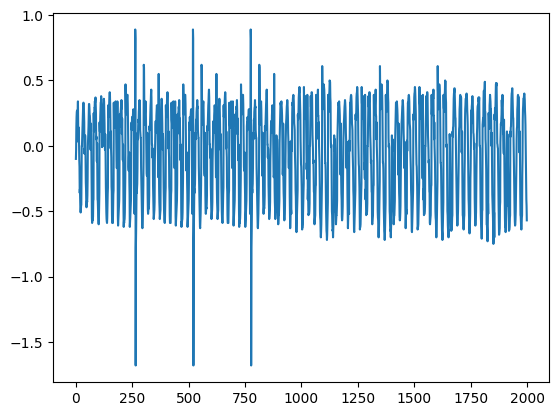

In [2]:
a = 5000  # 4000
b = 7000  # :

with open("x_data.txt", "rt") as x_data_file:
  line = x_data_file.readline()
  Xdata = np.array(list(map(float, line.split()))).reshape(-1, 1)[a : b]
  print(Xdata)

  plt.plot(Xdata)

[[-0.38]
 [-0.38]
 [-0.32]
 ...
 [ 0.4 ]
 [ 0.37]
 [ 0.2 ]]


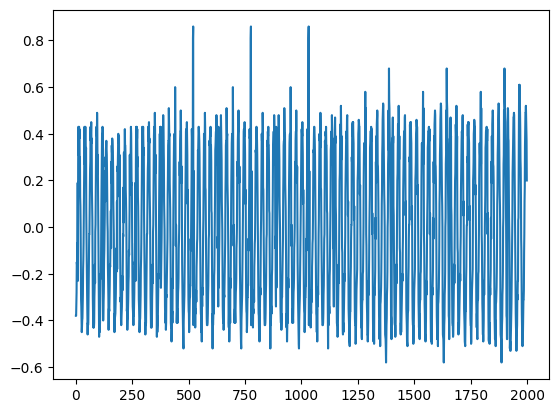

In [3]:
a = 5000  # 4000
b = 7000  # :

with open("y_data.txt", "rt") as y_data_file:
  line = y_data_file.readline()
  Ydata = np.array(list(map(float, line.split()))).reshape(-1, 1)[a : b]
  print(Ydata)

  plt.plot(Ydata)

[[0.83]
 [0.84]
 [0.86]
 ...
 [0.83]
 [0.81]
 [0.81]]


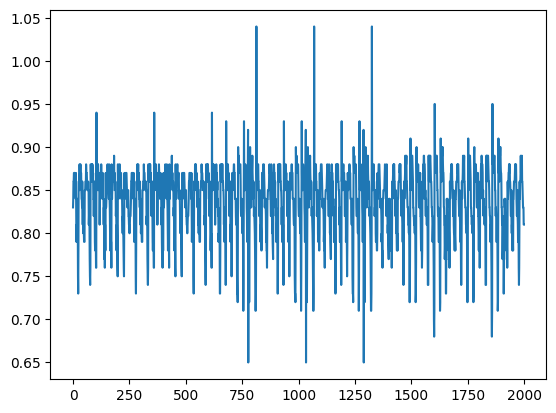

In [4]:
a = 5000  # 4000
b = 7000  # :

with open("z_data.txt", "rt") as z_data_file:
  line = z_data_file.readline()
  Zdata = np.array(list(map(float, line.split()))).reshape(-1, 1)[a : b]
  print(Zdata)

  plt.plot(Zdata)

In [5]:
x_data = np.concatenate((Xdata, Ydata, Zdata), axis=1)

print(Xdata[:5])
print(Ydata[:5])
print(Zdata[:5])

print(x_data[:5])

print(x_data.shape)

[[-0.1 ]
 [-0.03]
 [ 0.14]
 [ 0.22]
 [ 0.26]]
[[-0.38]
 [-0.38]
 [-0.32]
 [-0.28]
 [-0.15]]
[[0.83]
 [0.84]
 [0.86]
 [0.86]
 [0.87]]
[[-0.1  -0.38  0.83]
 [-0.03 -0.38  0.84]
 [ 0.14 -0.32  0.86]
 [ 0.22 -0.28  0.86]
 [ 0.26 -0.15  0.87]]
(2000, 3)


[[-0.1  -0.38  0.83]
 [-0.03 -0.38  0.84]
 [ 0.14 -0.32  0.86]
 [ 0.22 -0.28  0.86]
 [ 0.26 -0.15  0.87]]
[[-0.17  0.4   0.86]
 [-0.05  0.38  0.87]
 [ 0.03  0.47  0.87]
 [-0.22  0.48  0.85]
 [-0.39  0.35  0.85]]


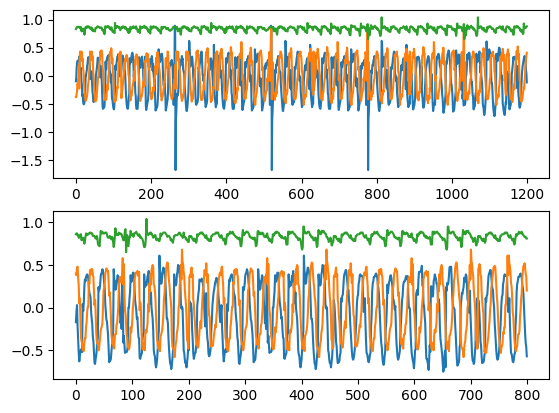

In [6]:
# Divide into train and test datasets.
train_ratio = 0.6

Xtrain = x_data[:int(train_ratio * x_data.shape[0])]
Xtest = x_data[int(train_ratio * x_data.shape[0]):]

print(Xtrain[:5])
print(Xtest[:5])

plt.subplot(2, 1, 1)
plt.plot(Xtrain)
plt.subplot(2, 1, 2)
plt.plot(Xtest)

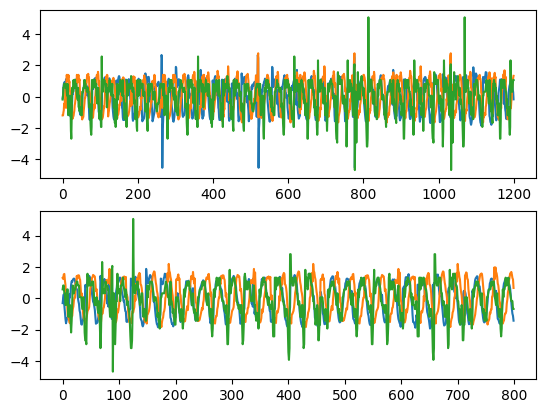

In [7]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized.
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

plt.subplot(2, 1, 1)
plt.plot(Xtrain)
plt.subplot(2, 1, 2)
plt.plot(Xtest)

In [8]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 2. We will make timesteps = 3.
#With this, the resultant n_samples is 5 (as the input data has 9 rows).

seq_size = 30  # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.


def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(x.shape[0] - seq_size):
        #print(i)
        x_values.append(x[i:(i+seq_size)])
        y_values.append(y[i+seq_size])

    return np.array(x_values), np.array(y_values)

In [9]:
trainX, trainY = to_sequences(Xtrain, Xtrain, seq_size)
testX, testY = to_sequences(Xtest, Xtest, seq_size)

In [14]:
print(Xtrain.shape)
print(Xtest.shape)

print(trainX.shape)
print(trainY.shape)

# print(trainX)
# print(trainY)

# plt.plot(trainX)
# plt.plot(trainY)

(1200, 3)
(800, 3)
(1170, 30, 3)
(1170, 3)


In [11]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(rate=0.2))

# model.add(RepeatVector(trainX.shape[1]))

# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(rate=0.2))
# model.add(TimeDistributed(Dense(trainX.shape[2])))
# model.compile(optimizer='adam', loss='mae')
# model.summary()

In [12]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(trainX.shape[2])))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           67584     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 64)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           98816     
                                                                 
 time_distributed (TimeDist  (None, 30, 3)             387       
 ributed)                                               

In [13]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/mean_squared_error/BroadcastGradientArgs defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-13-18f3cbaac984>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

Incompatible shapes: [32,30,3] vs. [32,3]
	 [[{{node gradient_tape/mean_squared_error/BroadcastGradientArgs}}]] [Op:__inference_train_function_6558]

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#Anomaly is where reconstruction error is large.
#We can define this value beyond which we call anomaly.
#Let us look at MAE in training prediction

trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)

In [ ]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)

In [ ]:
# max_trainMAE = 1.8 #or Define 90% value of max as threshold.
max_trainMAE = np.max(trainMAE) * 0.9
print(max_trainMAE)

In [ ]:
print(trainMAE.shape)
print(testMAE.shape)

In [ ]:
train_anomaly_indices = np.asarray(trainMAE > max_trainMAE).nonzero()[0]
test_anomaly_indices = np.asarray(testMAE > max_trainMAE).nonzero()[0]

anomaly_indices = np.concatenate((train_anomaly_indices.reshape(-1, 1), test_anomaly_indices.reshape(-1, 1) + int(train_ratio * x_data.size)))
anomaly_values = np.concatenate((Xtrain[train_anomaly_indices], Xtest[test_anomaly_indices]))

plt.plot(np.concatenate((Xtrain, Xtest)))
plt.scatter(anomaly_indices, anomaly_values, c="r")

In [ ]:
a = 2000
b = 3000

plt.plot(testMAE[a: b])
plt.axhline(y=max_trainMAE, color='r', linestyle='-')